In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
#shape of the data 
df.shape

(78095, 35)

In [4]:
# statistics of the data 
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,...,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.374640,85.892776,-29.991304,49.622910,86.245674,-29.512995,48.630439,83.821130,...,-18.461789,39.175811,84.912349,-16.233230,40.492317,76.139519,-21.675478,55.101724,77.067059,-29.510432
std,1.421152,4.697754,32.565248,39.976071,34.340173,32.356941,40.302889,34.750244,33.529044,40.883994,...,25.754448,13.136587,26.219305,21.875150,24.430996,26.250998,14.746789,2.782504,1.203050,2.191924
min,1.000000,0.000000,-35.495397,-10.918646,-126.770872,-35.755424,-13.952197,-142.848900,-44.409469,-14.858248,...,-79.784701,15.951786,25.722207,-64.272867,-33.485287,-1.484185,-48.713932,49.600755,74.892801,-32.567608
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,...,-31.100188,33.041242,70.373271,-26.355574,17.081878,51.943822,-25.883805,54.057026,76.311915,-29.692614
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,...,-26.419750,36.448317,75.621892,-10.499366,40.859625,76.333138,-23.045154,54.542435,77.257991,-29.692614
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,...,1.356154,44.434212,100.140647,-1.077380,50.793322,87.562493,-10.663720,57.027873,77.257991,-27.775952
max,5.000000,14.000000,137.279372,169.175464,80.986235,136.274183,170.209350,85.120412,141.144862,168.186466,...,50.040667,61.523668,144.791711,36.839913,101.360486,140.990500,12.166408,61.484145,78.677105,-24.900958


In [5]:
# Checking for the number of each output class labels 
# It is a blanced multi class dataset with each class is having equal number of output labels 
df['Class'].value_counts()


3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

## classification with svm Linear kernel  

In [6]:
from sklearn.svm import LinearSVC

In [7]:
# Splitting the data to input data and output data
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [10]:
clf_svc_lin = LinearSVC()
clf_svc_lin.fit(X_train_scaled, y_train)

LinearSVC()

In [11]:
# Predict target values using testing data
y_pred_svc_lin = clf_svc_lin.predict(X_test_scaled)

In [47]:
# Calculate accuracy of SVM classifier
accuracy = accuracy_score(y_test, y_pred_svc_lin)
print("Accuracy for the linear support vector model before getting best hyper parameters is:", accuracy)

Accuracy for the linear support vector model before getting best hyper parameters is: 0.964744547355841


In [13]:
print(classification_report(y_test, y_pred_svc_lin))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4898
           2       0.93      0.95      0.94      4485
           3       0.96      0.98      0.97      4854
           4       0.98      0.99      0.98      4496
           5       0.97      0.91      0.94      4696

    accuracy                           0.96     23429
   macro avg       0.96      0.96      0.96     23429
weighted avg       0.96      0.96      0.96     23429



In [14]:
print(confusion_matrix(y_test, y_pred_svc_lin))

[[4882   15    0    0    1]
 [  29 4253   56   33  114]
 [   6   54 4757    0   37]
 [   0   17   30 4449    0]
 [  16  221  124   73 4262]]


# Tuning the hyper parameters

In [15]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_svc_lin = GridSearchCV(clf_svc_lin, param_grid, cv=5, verbose = 3)

# fitting the model for grid search
grid_svc_lin.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............................C=0.01;, score=0.963 total time=   1.4s
[CV 2/5] END ............................C=0.01;, score=0.963 total time=   1.0s
[CV 3/5] END ............................C=0.01;, score=0.968 total time=   0.8s
[CV 4/5] END ............................C=0.01;, score=0.965 total time=   1.0s
[CV 5/5] END ............................C=0.01;, score=0.964 total time=   0.9s
[CV 1/5] END .............................C=0.1;, score=0.963 total time=   4.9s
[CV 2/5] END .............................C=0.1;, score=0.963 total time=   4.2s
[CV 3/5] END .............................C=0.1;, score=0.968 total time=   4.3s
[CV 4/5] END .............................C=0.1;, score=0.965 total time=   4.1s
[CV 5/5] END .............................C=0.1;, score=0.964 total time=   4.0s
[CV 1/5] END ...............................C=1;, score=0.963 total time=  18.4s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, verbose=3)

In [16]:
# print best parameter after tuning
print(grid_svc_lin.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc_lin.best_estimator_)

{'C': 0.01}
LinearSVC(C=0.01)


In [42]:
grid_predictions_svc_lin = grid_svc_lin.predict(X_test_scaled)

In [43]:
print(f" The testing data accuracy for the SVC linear model using best params is {accuracy_score(y_test, grid_predictions_svc_lin)}")

 The testing data accuracy for the SVC linear model using best params is 0.9646165009176662


In [17]:
# print classification report
print(classification_report(y_test, grid_predictions_svc_lin))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4898
           2       0.93      0.95      0.94      4485
           3       0.96      0.98      0.97      4854
           4       0.98      0.99      0.98      4496
           5       0.97      0.91      0.94      4696

    accuracy                           0.96     23429
   macro avg       0.96      0.96      0.96     23429
weighted avg       0.96      0.96      0.96     23429



In [18]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_svc_lin = confusion_matrix(y_test, grid_predictions_svc_lin)
conf_matrix_svc_lin

array([[4882,   15,    0,    0,    1],
       [  25, 4253,   56,   35,  116],
       [   6,   53, 4758,    0,   37],
       [   0,   18,   31, 4447,    0],
       [  16,  222,  123,   75, 4260]], dtype=int64)

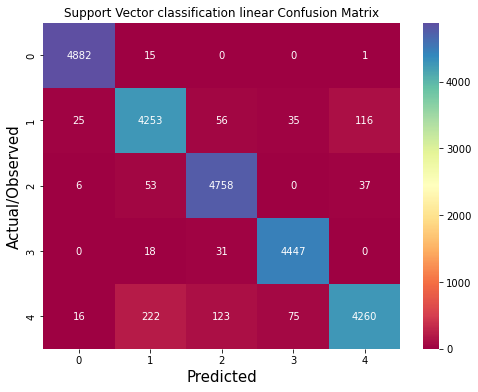

In [19]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_svc_lin, 
            annot=True, 
            cmap="Spectral",
            fmt = "g")
plt.title("Support Vector classification linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# classification using Non Linear svm kernel

In [20]:
from sklearn.svm import SVC

In [48]:
clf_svc = SVC()
clf_svc.fit(X_train_scaled, y_train)

SVC()

In [49]:
# Predict target values using testing data
y_pred_svc = clf_svc.predict(X_test_scaled)

In [50]:
# Calculate accuracy of SVM classifier
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy for the non-linear support vector model before getting best hyper parameters is:", accuracy)

Accuracy for the non-linear support vector model before getting best hyper parameters is: 0.9949208246190618


In [51]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.98      0.99      0.99      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.98      0.99      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [52]:
print(confusion_matrix(y_test,y_pred_svc))

[[4881   16    0    0    1]
 [   0 4455    0    0   30]
 [   0    0 4854    0    0]
 [   0    0    0 4496    0]
 [   0   72    0    0 4624]]


## Finding best model using Hyper parameter validation

In [26]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel':['poly']}

grid_svc = GridSearchCV(clf_svc, param_grid, cv=5, verbose = 2)

# fitting the model for grid search
grid_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time= 7.1min
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time= 7.3min
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time= 7.0min
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time= 6.8min
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time= 7.8min
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time= 8.6min
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time= 7.1min
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time= 7.3min
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time= 7.2min
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time= 7.5min
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=  33.8s
[CV] END .....................C=0.01, gamma=0.1

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['poly']},
             verbose=2)

In [27]:
# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, gamma=0.1, kernel='poly')


In [45]:
CV_y_pred_svc = grid_svc.predict(X_test_scaled)

In [46]:
print(f" The testing data accuracy for the SVC model using best params is {accuracy_score(y_test, CV_y_pred_svc)}")

 The testing data accuracy for the SVC model using best params is 0.9945793674505954


In [28]:
# print classification report
print(classification_report(y_test, CV_y_pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.99      0.99      0.99      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.99      0.99      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [29]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_svc = confusion_matrix(y_test, CV_y_pred_svc)
conf_matrix_svc

array([[4881,   16,    0,    1,    0],
       [   5, 4432,    7,    2,   39],
       [   1,    0, 4853,    0,    0],
       [   0,    0,    1, 4495,    0],
       [   2,   42,    7,    4, 4641]], dtype=int64)

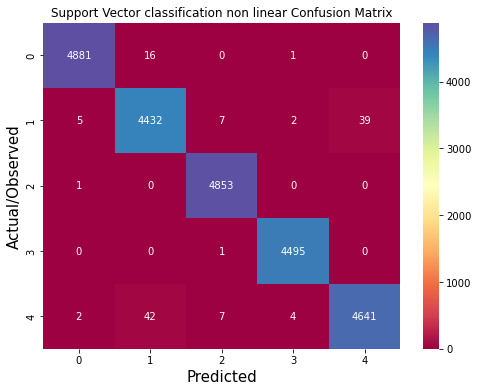

In [30]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_svc, 
            annot=True, 
            cmap="Spectral",
            fmt = "g"
                      )
plt.title("Support Vector classification non linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# classification  using Deep  Learning Model, Multi layer perceptron

In [31]:
# Importing the deep learning model
from sklearn.neural_network import MLPClassifier

In [32]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)

MLPClassifier()

In [33]:
# finding accuracy for the random model
y_pred_mlp  = mlp.predict(X_test_scaled)

In [34]:
print(f" The testing data accuracy for the best model is {accuracy_score(y_test,y_pred_mlp)}")

 The testing data accuracy for the best model is 0.9958598318323445


## Hyper parameter tuning for the model 

In [35]:
mlp = MLPClassifier()
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (500,), (1000,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform grid search cross-validation

grid_mlp = GridSearchCV(mlp, param_grid, cv=5, verbose = 3)
grid_mlp.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.995 total time=  20.4s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.995 total time=  17.0s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.995 total time=  17.2s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.996 total time=  19.9s
[CV 5/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.994 total time=  17.5s
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.994 total time=  18.6s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.995 total time=  18.0s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.995 total time=  19.8s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100,), lear

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (200,), (500,),
                                                (1000,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=3)

In [36]:
# Print the best hyperparameters
print(f'Best hyperparameters: {grid_mlp.best_params_}')

Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (1000,), 'learning_rate': 'adaptive'}


In [37]:
CV_y_pred_mlp  = grid_mlp.predict(X_test_scaled)
print(f" The testing data accuracy for the best model is {accuracy_score(y_test,CV_y_pred_mlp)}")

 The testing data accuracy for the best model is 0.9967134747535106


In [38]:
# print classification report
print(classification_report(y_test, CV_y_pred_mlp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.99      1.00      0.99      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       1.00      0.99      0.99      4696

    accuracy                           1.00     23429
   macro avg       1.00      1.00      1.00     23429
weighted avg       1.00      1.00      1.00     23429



In [39]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_mlp = confusion_matrix(y_test, CV_y_pred_mlp)
conf_matrix_mlp

array([[4881,   17,    0,    0,    0],
       [   1, 4463,    0,    0,   21],
       [   0,    0, 4852,    2,    0],
       [   0,    0,    0, 4496,    0],
       [   0,   35,    1,    0, 4660]], dtype=int64)

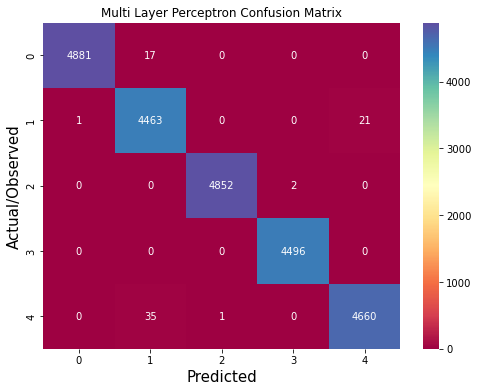

In [40]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_mlp, 
            annot=True, 
            cmap="Spectral",
            fmt = "g"
                      )
plt.title("Multi Layer Perceptron Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);